In [1]:
from sklearn.cluster import SpectralClustering,SpectralBiclustering,SpectralCoclustering
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#this is for ignore all warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('data.csv')

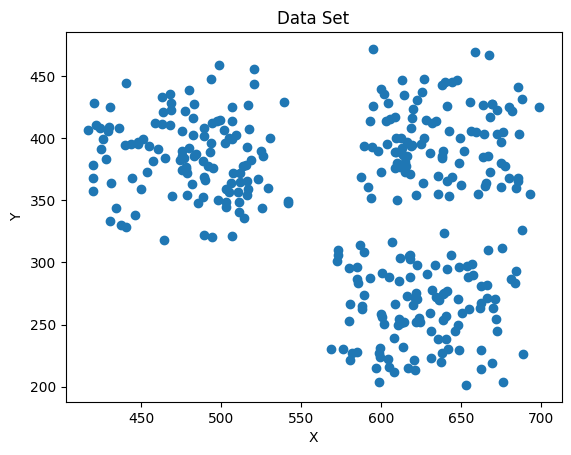

In [4]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### Spectral Clustering
- Description: 
Spectral Clustering is an algorithm used for clustering data based on the eigenvalues (spectral) of a similarity matrix derived from the data. It involves three main steps: constructing a similarity matrix (often using a Gaussian kernel or k-nearest neighbors), computing the Laplacian matrix of this similarity graph, and then performing eigenvalue decomposition on the Laplacian. The algorithm selects the top k eigenvectors to form a new matrix, which is then used to cluster the data using k-means or another clustering method. Spectral Clustering is particularly useful for detecting non-convex clusters and is effective in high-dimensional spaces.


In [23]:
# initialize and fit the spectral clustering model in this example we will use different kernels and try to find the best one
def best_kernel(kernels:tuple)->dict:
    result = {}
    for kernel in ('nearest_neighbors', 'rbf', 'sigmoid', 'poly', 'linear', 'cosine'):
        spectral = SpectralClustering(n_clusters=3,affinity =kernel,random_state=0)
        cluster_labels=spectral.fit_predict(data)
        silhouette = round(silhouette_score(data, cluster_labels),4)
        davies_bouldin = round(davies_bouldin_score(data, cluster_labels),4)
        calinski_harabasz = round(calinski_harabasz_score(data, cluster_labels),4)
        result[kernel]=[silhouette,davies_bouldin,calinski_harabasz]
    return result
 


In [26]:
results = best_kernel(('nearest_neighbors', 'rbf', 'sigmoid', 'poly', 'linear', 'cosine'))

In [42]:
# convert dictionary to dataframe
pd.DataFrame(results,index=["silhouette","davies_bouldin","calinski_harabasz"])

,nearest_neighbors,rbf,sigmoid,poly,linear,cosine
silhouette,0.6111,0.0365,-0.0644,0.2100,0.2100,0.1034
davies_bouldin,0.5504,0.8437,41.6163,0.8003,0.8003,0.8681
calinski_harabasz,785.9318,1.2574,2.7354,150.1086,150.1086,148.9311


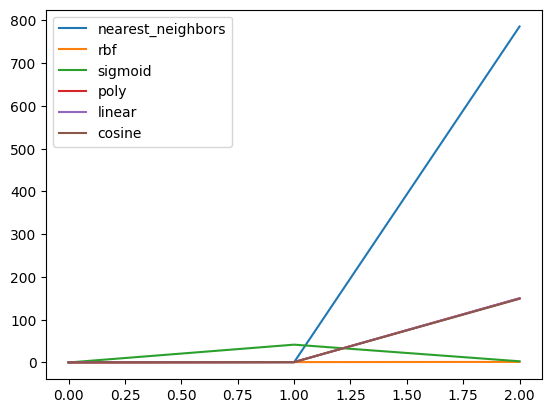

In [44]:
# lets plot the results
plt.plot(results['nearest_neighbors'],label='nearest_neighbors')
plt.plot(results['rbf'],label='rbf')
plt.plot(results['sigmoid'],label='sigmoid')
plt.plot(results['poly'],label='poly')
plt.plot(results['linear'],label='linear')
plt.plot(results['cosine'],label='cosine')
plt.legend()
plt.show()


In [45]:
# based on the results the best kernel is "nearest_neighbors"

spectral = SpectralClustering(n_clusters=3,affinity = 'nearest_neighbors',random_state=0)   
cluster_labels=spectral.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))


the best silhouette_score = 0.6111
the best davies_bouldin_score = 0.5504
the best calinski_harabasz_score = 785.9318


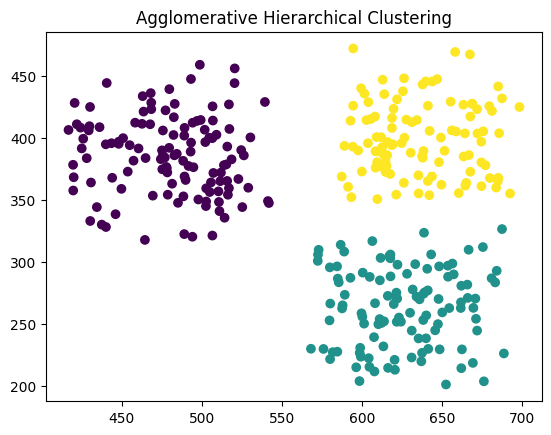

In [47]:
# plot the clusters
plt.scatter(data['X'], data['Y'], c=cluster_labels)
plt.title('Agglomerative Hierarchical Clustering')
plt.show()